In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
%matplotlib inline

2023-07-21 09:21:54.499353: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-21 09:21:54.540130: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-21 09:21:54.540855: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-21 09:21:55.212597: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels) = fashion_mnist.load_data()

In [3]:
train_images=train_images/255.0
test_images=test_images/255.0

In [4]:
#创建层
input=keras.Input(shape=(28,28))
x=keras.layers.Flatten()(input)
x=keras.layers.Dense(32,activation='relu')(x)
x=keras.layers.Dropout(0.5)(x)
x=keras.layers.Dense(64,activation='relu')(x)
output=keras.layers.Dense(10,activation='softmax')(x)

In [5]:
#初始化模型
model=keras.Model(inputs=input,outputs=output)

In [6]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 27882 (108.91 KB)
Trainable params: 27882 (108.

In [7]:
 model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [8]:
history=model.fit(train_images,
                 train_labels,
                 epochs=30,
                 validation_data=(test_images,test_labels))

Epoch 1/30
1875/1875 [==============================] - 3s 1ms/step - loss: 0.9069 - acc: 0.6582 - val_loss: 0.5763 - val_acc: 0.8069
Epoch 2/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6894 - acc: 0.7436 - val_loss: 0.5959 - val_acc: 0.7767
Epoch 3/30
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6478 - acc: 0.7631 - val_loss: 0.6299 - val_acc: 0.7550
Epoch 4/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6221 - acc: 0.7724 - val_loss: 0.5700 - val_acc: 0.7976
Epoch 5/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5964 - acc: 0.7814 - val_loss: 0.6250 - val_acc: 0.7666
Epoch 6/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5834 - acc: 0.7879 - val_loss: 0.6323 - val_acc: 0.7438
Epoch 7/30
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5685 - acc: 0.7925 - val_loss: 0.6320 - val_acc: 0.7525
Epoch 8/30
1875/1875 [==============================] - 2s 1ms

In [9]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

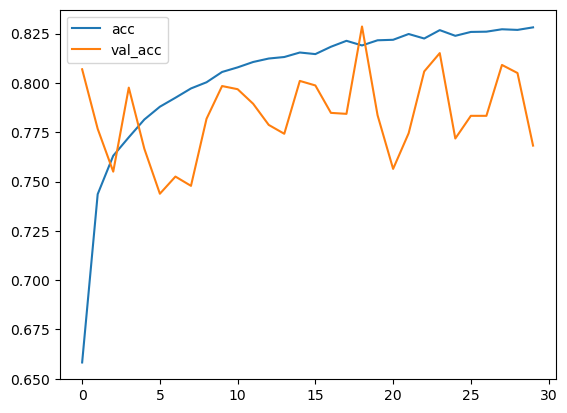

In [10]:
#绘制损失数据
plt.plot(history.epoch,history.history.get('acc'),label='acc')
plt.plot(history.epoch,history.history.get('val_acc'),label='val_acc')
plt.legend()